In [1]:
import numpy as pd

In [2]:
import pandas as pd

In [4]:
pip install --upgrade scikit-learn

In [7]:
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

imputer = SimpleImputer(strategy='mean')

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.naive_bayes import GaussianNB

In [10]:
from sklearn.metrics import accuracy_score

In [12]:
adult_df = pd.read_csv('adult.data', header = None, delimiter=' *, *', engine='python')

In [14]:
adult_df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [17]:
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']

In [15]:
len(adult_df)

32561

In [18]:
adult_df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [20]:
for value in ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']:
    print(value, ":", sum(adult_df[value] == '?'))

workclass : 1836
education : 0
marital_status : 0
occupation : 1843
relationship : 0
race : 0
sex : 0
native_country : 583
income : 0


In [21]:
adult_df_rev = adult_df.copy(deep=True)

In [22]:
adult_df_rev.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [23]:
adult_df_rev.describe(include = 'all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [25]:
for value in ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income'] :
       replaceValue = adult_df_rev.describe(include='all')[value][2]
       adult_df_rev[value][adult_df_rev[value]=='?'] = replaceValue

<ipython-input-25-133ed323831c>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  replaceValue = adult_df_rev.describe(include='all')[value][2]
<ipython-input-25-133ed323831c>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps 

In [28]:
pip install scikit-learn

In [31]:
from operator import le
le = LabelEncoder()

workclass_cat = le.fit_transform(adult_df.workclass)
education_cat = le.fit_transform(adult_df.education)
marital_cat = le.fit_transform(adult_df.marital_status)
occupation_cat = le.fit_transform(adult_df.occupation)
relationship_cat = le.fit_transform(adult_df.relationship)
race_cat = le.fit_transform(adult_df.race)
sex_cat = le.fit_transform(adult_df.sex)
native_country_cat = le.fit_transform(adult_df.native_country)

In [32]:
adult_df_rev['workclass_cat'] = workclass_cat
adult_df_rev ['education_cat'] = education_cat
adult_df_rev ['marital_cat'] = marital_cat
adult_df_rev ['occupation_cat'] = occupation_cat
adult_df_rev ['relationship_cat'] = relationship_cat
adult_df_rev ['race_cat'] = race_cat
adult_df_rev ['sex_cat'] = sex_cat
adult_df_rev ['native_country_cat'] = native_country_cat

In [33]:
adult_df_rev.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,native_country,income,workclass_cat,education_cat,marital_cat,occupation_cat,relationship_cat,race_cat,sex_cat,native_country_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,United-States,<=50K,7,9,4,1,1,4,1,39
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,United-States,<=50K,6,9,2,4,0,4,1,39
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,United-States,<=50K,4,11,0,6,1,4,1,39
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,United-States,<=50K,4,1,2,6,0,2,1,39
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,Cuba,<=50K,4,9,2,10,5,2,0,5


In [34]:
dummy_fields = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
adult_df_rev = adult_df_rev.drop(dummy_fields, axis = 1)

In [36]:
adult_df_rev = adult_df_rev.reindex(columns=['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                                             'marital_status', 'occupation', 'relationship', 'race', 'sex',
                                             'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
                                             'income'])
adult_df_rev.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,NaN,77516,NaN,13,NaN,NaN,NaN,NaN,NaN,2174,0,40,NaN,<=50K
1,50,NaN,83311,NaN,13,NaN,NaN,NaN,NaN,NaN,0,0,13,NaN,<=50K
2,38,NaN,215646,NaN,9,NaN,NaN,NaN,NaN,NaN,0,0,40,NaN,<=50K
3,53,NaN,234721,NaN,7,NaN,NaN,NaN,NaN,NaN,0,0,40,NaN,<=50K
4,28,NaN,338409,NaN,13,NaN,NaN,NaN,NaN,NaN,0,0,40,NaN,<=50K


In [37]:
X = adult_df_rev.values[:, :14]
Y = adult_df_rev.values[:, 14]

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB

In [44]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [ 1  3  5  6  7  8  9 13]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [ 1  3  5  6  7  8  9 13]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [45]:
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB()

In [46]:
Y_pred = clf.predict(X_test)

In [47]:
accuracy_score(Y_test, Y_pred,normalize=True)

0.7928140034803972

In [49]:
print("Test accuracy: %f" % clf.score(X_test, Y_test))

Test accuracy: 0.792814


In [53]:
pip install diffprivlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 4.3 MB/s eta 0:00:00


In [51]:
import numpy as np
import matplotlib.pyplot as plt

Try different epsilon value

/usr/local/lib/python3.10/dist-packages/diffprivlib/models/naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
/usr/local/lib/python3.10/dist-packages/diffprivlib/models/naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
/usr/local/lib/python3.10/dist-packages/diffprivlib/models/naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be 

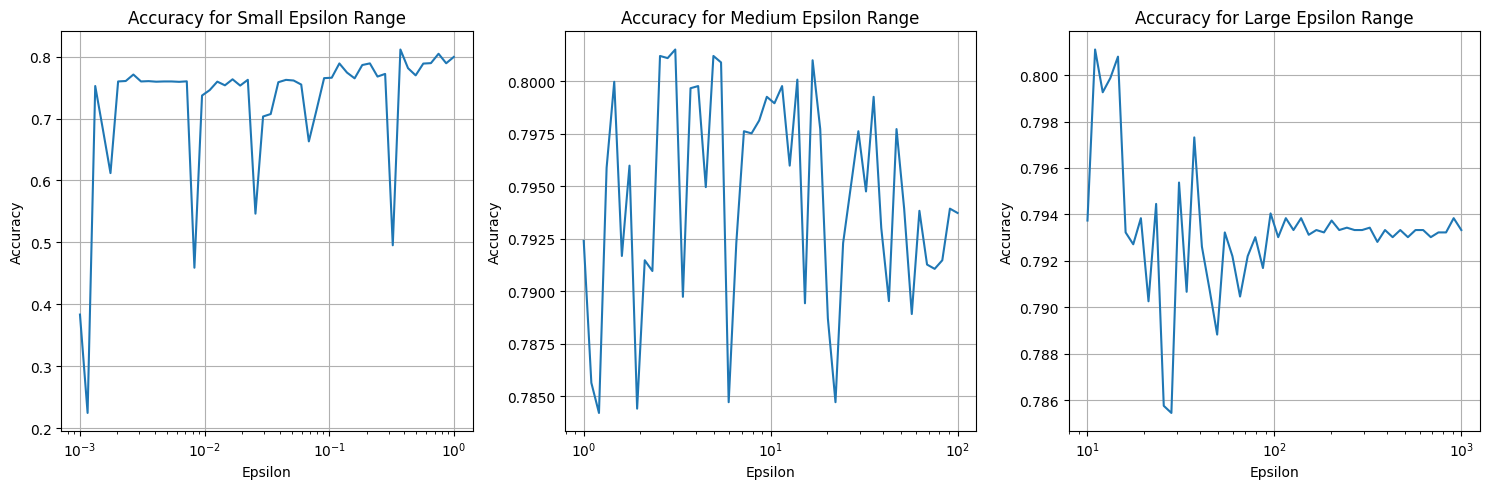

In [57]:
from diffprivlib.models import GaussianNB
import numpy as np
import matplotlib.pyplot as plt

epsilons1 = np.logspace(-3, 0, 50)
accuracy1 = []

epsilons2 = np.logspace(0, 2, 50)
accuracy2 = []

epsilons3 = np.logspace(1, 3, 50)
accuracy3 = []

for epsilon in epsilons1:
    clf = GaussianNB(epsilon=epsilon)
    clf.fit(X_train, Y_train)
    accuracy1.append(clf.score(X_test, Y_test))

for epsilon in epsilons2:
    clf = GaussianNB(epsilon=epsilon)
    clf.fit(X_train, Y_train)
    accuracy2.append(clf.score(X_test, Y_test))

for epsilon in epsilons3:
    clf = GaussianNB(epsilon=epsilon)
    clf.fit(X_train, Y_train)
    accuracy3.append(clf.score(X_test, Y_test))

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.semilogx(epsilons1, accuracy1, label="Small Epsilon Range")
plt.title("Accuracy for Small Epsilon Range")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.semilogx(epsilons2, accuracy2, label="Medium Epsilon Range")
plt.title("Accuracy for Medium Epsilon Range")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.semilogx(epsilons3, accuracy3, label="Large Epsilon Range")
plt.title("Accuracy for Large Epsilon Range")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()


With small epsilon values, I increased privacy but saw a drop in accuracy because the model's predictions became noisier. The medium epsilon range provided a better balance between privacy and accuracy; I noticed a significant improvement in accuracy while the privacy loss remained minimal. With large epsilon values, accuracy improved considerably, but the risk to privacy increased. Therefore, the choice of epsilon depends on how much balance I need to strike between accuracy and privacy.